In [1]:
import torch
from torchvision import models
from torchvision import transforms
from PIL import Image
import torchaudio
import torchaudio.transforms as T
import os
import pandas as pd

c:\Users\victor.serra\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] Não foi possível encontrar o procedimento especificado
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
# model = models.densenet121(pretrained=False)

# model.classifier = torch.nn.Linear(model.classifier.in_features, 373)
# model.load_state_dict(torch.load('densenet_model_10.pth', map_location=torch.device('cpu')))
# model.eval()

In [2]:
model = models.resnet50(pretrained=False)

model.fc = torch.nn.Linear(model.fc.in_features, 373)
model.load_state_dict(torch.load('resnet_model_9.pth', map_location=torch.device('cpu')))
model.eval()

c:\Users\victor.serra\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\victor.serra\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [57]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

In [18]:
labels = pd.read_csv('labels.csv')
labels.head()

,file_name,tuning,details,clean,chord
0,t_DADGBE_guitarA(b5)sus_Cfastxx108108DADGBE.mp3,DADGBE,A(b5)sus_Cfastxx108108,A(b5)sus_Cfastxx108108,Adim
1,t_DADGBE_guitarA(b5)sus_Fsfast404242DADGBE.mp3,DADGBE,A(b5)sus_Fsfast404242,A(b5)sus_Fsfast404242,D#dim
2,t_DADGBE_guitarA11sus2_Cfast1077787DADGBE.mp3,DADGBE,A11sus2_Cfast1077787,A11sus2_Cfast1077787,Am11
3,t_DADGBE_guitarA11sus2_Fsfast400000DADGBE.mp3,DADGBE,A11sus2_Fsfast400000,A11sus2_Fsfast400000,Em11
4,t_DADGBE_guitarA13fast004020DADGBE.mp3,DADGBE,A13fast004020,A13fast004020,A13


In [113]:
def filter_rows(row):
    clean_prefix = row['clean'].split('_')[0] if '_' in row['clean'] else row['clean']
    chord_prefix = row['chord'].split('\\')[0]
    return clean_prefix == chord_prefix or chord_prefix in row['clean']

# Aplicar o filtro
labels = labels[labels.apply(filter_rows, axis=1)]

In [122]:
filtered_rows[(filtered_rows['clean'] == 'C5_Efast032010')]

,file_name,tuning,details,clean,chord
36936,t_EADGBE_guitarC5_Efast032010.mp3,EADGBE,C5_Efast032010,C5_Efast032010,C


In [111]:
labels[(labels['chord'] == 'C9\G')].head()

,file_name,tuning,details,clean,chord
2427,t_DADGBE_guitarC9_Gfast010010DADGBE.mp3,DADGBE,C9_Gfast010010,C9_Gfast010010,C9\G
2428,t_DADGBE_guitarC9_Gfast210010DADGBE.mp3,DADGBE,C9_Gfast210010,C9_Gfast210010,C9\G
2429,t_DADGBE_guitarC9_Gfast555556DADGBE.mp3,DADGBE,C9_Gfast555556,C9_Gfast555556,C9\G
2430,t_DADGBE_guitarC9_Gfast555556DADGBEv.mp3,DADGBE,C9_Gfast555556v,C9_Gfast555556v,C9\G
2431,t_DADGBE_guitarC9_Gfast558558DADGBEv.mp3,DADGBE,C9_Gfast558558v,C9_Gfast558558v,C9\G


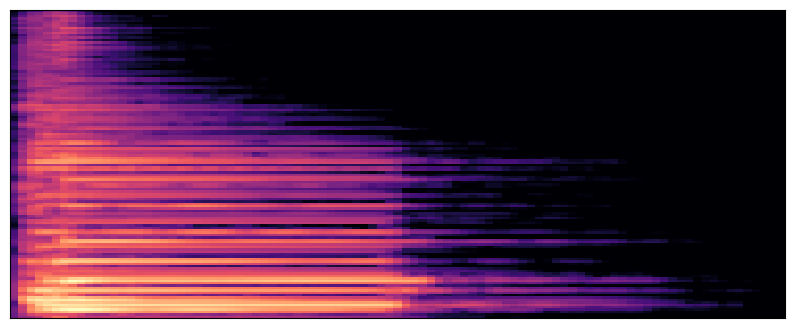

In [142]:
audio_data, sampling_rate = librosa.load('chords/variation_chord_audio/t_EADGBE_guitarGs5strum466x44.mp3')
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sampling_rate)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
fig, ax = plt.subplots(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), ax=ax, x_axis=None, y_axis=None)

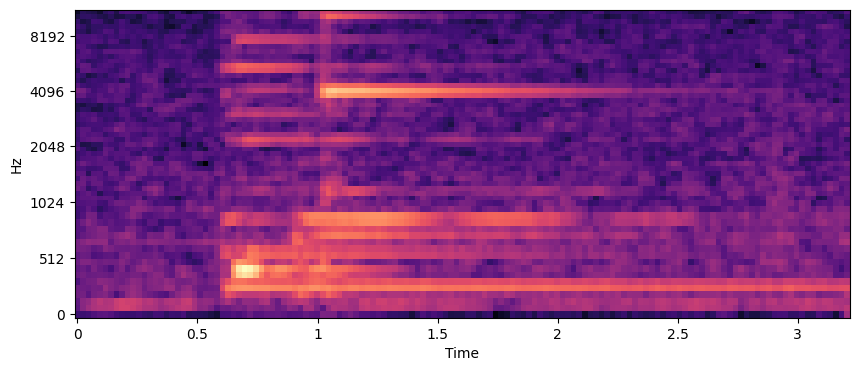

In [136]:
audio_data, sampling_rate = librosa.load('audios_testes/do_mi.mp3')
# Gerar o Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sampling_rate)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Thresholding
threshold = np.percentile(mel_spectrogram_db, 76)  # Define o limiar como o percentil 80
mask = mel_spectrogram_db > threshold

# Detecção de região e Bounding Box
labeled_array, num_features = label(mask)
# Identifique a maior região conectada, que seria o seu sinal principal
sizes = [np.sum(labeled_array == i) for i in range(1, num_features + 1)]
max_region_label = np.argmax(sizes) + 1
# Crie uma máscara para a maior região
main_region_mask = labeled_array == max_region_label

# Encontre os limites do slicing
rows = np.any(main_region_mask, axis=1)
cols = np.any(main_region_mask, axis=0)
row_min, row_max = np.where(rows)[0][[0, -1]]
col_min, col_max = np.where(cols)[0][[0, -1]]

# Slicing do array para obter apenas a região de interesse
mel_spectrogram_db_clean = mel_spectrogram_db[row_min:row_max, col_min:col_max]

# Exibir o espectrograma cortado
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db_clean, sr=sampling_rate, x_axis='time', y_axis='mel')

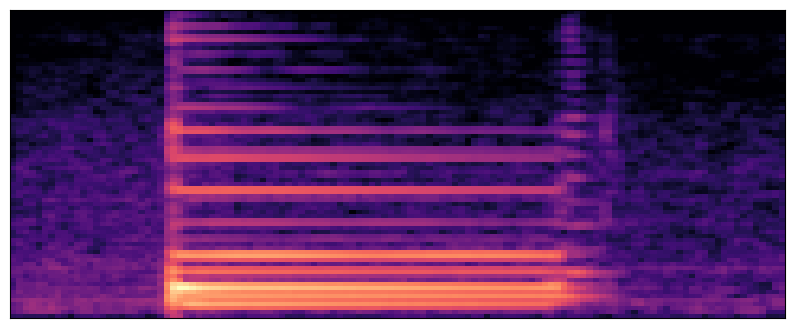

In [143]:
audio_data, sampling_rate = librosa.load('audios_testes/G#5nylon.mp3')
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sampling_rate)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

threshold = np.percentile(mel_spectrogram_db, 80)  # Define o limiar como o percentil 80
mask = mel_spectrogram_db > threshold

# Detecção de região e Bounding Box
labeled_array, num_features = label(mask)
# Identifique a maior região conectada, que seria o seu sinal principal
sizes = [np.sum(labeled_array == i) for i in range(1, num_features + 1)]
max_region_label = np.argmax(sizes) + 1

# Crie uma máscara para a maior região
main_region_mask = labeled_array == max_region_label

# Encontre os limites do slicing
rows = np.any(main_region_mask, axis=1)
cols = np.any(main_region_mask, axis=0)
row_min, row_max = np.where(rows)[0][[0, -1]]
col_min, col_max = np.where(cols)[0][[0, -1]]

# Slicing do array para obter apenas a região de interesse
mel_spectrogram_db_clean = mel_spectrogram_db[row_min:row_max, col_min:col_max]

fig, ax = plt.subplots(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db_clean, sr=sampling_rate, ax=ax, x_axis=None, y_axis=None)

In [38]:
def process_image_tradicional(file_path):
    audio_data, sampling_rate = librosa.load(file_path)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sampling_rate)
    
    fig, ax = plt.subplots(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), ax=ax, x_axis=None, y_axis=None)
    plt.axis('off')
    plt.tight_layout()
    image_save_path = 'temp_file.png'
    plt.savefig(image_save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

    image = Image.open('temp_file.png').convert('RGB')
    image_tensor = transforms.ToTensor()(image)
    os.remove('temp_file.png')
    resize = transforms.Resize((224, 224))
    normalize = transforms.Normalize(mean=[0.30297324, 0.11515954, 0.23932154], std=[0.35486796, 0.1679149, 0.2177348])
    image_tensor_normalized = normalize(image_tensor)
    
    return image_tensor_normalized

In [3]:
def process_image(file_path):
    # Carrega o arquivo de áudio MP3 e converte para mono se estéreo
    waveform, sample_rate = torchaudio.load(file_path)
    if waveform.shape[0] > 1:  # Mais de um canal
        waveform = torch.mean(waveform, dim=0, keepdim=True)  # Média dos canais para mono
    
    # Realiza a transformação para espectrograma Mel
    spectrogram_transform = T.MelSpectrogram(sample_rate=sample_rate)
    spectrogram = spectrogram_transform(waveform)

    # Converte o espectrograma para decibéis
    spectrogram_db = T.AmplitudeToDB()(spectrogram)
    
    # Remove a primeira dimensão de 'canal', pois ela é 1 depois de converter para mono
    spectrogram_db = spectrogram_db.squeeze(0).numpy()
    
    # Converte para PIL Image e redimensiona para 224x224
    spectrogram_image = Image.fromarray(spectrogram_db, mode='L')
    resize_transform = transforms.Resize((224, 224))
    spectrogram_image = resize_transform(spectrogram_image)
    
    # Converta para tensor
    to_tensor_transform = transforms.ToTensor()
    image_tensor = to_tensor_transform(spectrogram_image)
    
    # Se o seu modelo espera uma imagem RGB, você precisa converter o tensor para ter 3 canais
    if image_tensor.shape[0] == 1:
        image_tensor = image_tensor.repeat(3, 1, 1)
    
    # Normalize
    normalize_transform = transforms.Normalize(mean=[0.30297324, 0.11515954, 0.23932154],
                                              std=[0.35486796, 0.1679149, 0.2177348])
    image_tensor = normalize_transform(image_tensor)
    
    return image_tensor


In [144]:
new_data_path = 'chords/variation_chord_audio/t_EADGBE_guitarGs5strum466x44.mp3'
# new_data_path = 'audios_testes/do_mi.mp3'  # Substitua pelo caminho do seu novo arquivo
image_tensor = process_image(new_data_path)

# Fazer a inferência
# Adicionar uma dimensão de batch com `unsqueeze`
image_tensor = image_tensor.unsqueeze(0)

# Fazer a previsão
with torch.no_grad():
    output = model(image_tensor)
    # Obter a classe prevista
    _, predicted_class = torch.max(output, 1)

# Fazer algo com o resultado da previsão
print(f'A classe prevista é: {predicted_class.item()}')

c:\Users\victor.serra\AppData\Local\Programs\Python\Python39\lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


A classe prevista é: 245


In [6]:
labels = pd.read_csv('labels.csv')
labels['file_name'] = labels['file_name'].apply(lambda x: f"{x.split('.')[0]}.png")
labels['chord_idx'] = pd.Categorical(labels['chord']).codes

In [7]:
acordes = labels[['chord','chord_idx']].drop_duplicates().sort_values('chord_idx')

In [145]:
acordes[acordes['chord_idx'] == predicted_class.item()]

,chord,chord_idx
5614,Em13,245
